In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import datetime 

In [3]:
drivers = pd.read_csv('/users/hannahlanders/downloads/drivers.csv')
races = pd.read_csv('/users/hannahlanders/downloads/races.csv')
constructors = pd.read_csv('/users/hannahlanders/downloads/constructors.csv')
driver_standings = pd.read_csv('/users/hannahlanders/downloads/driverStandings.csv')
constructor_standings = pd.read_csv('/users/hannahlanders/downloads/constructorStandings.csv')
constructor_results = pd.read_csv('/users/hannahlanders/downloads/constructorResults.csv')
pitstops = pd.read_csv('/users/hannahlanders/downloads/pitStops.csv')
results = pd.read_csv('/users/hannahlanders/downloads/results.csv')

In [4]:
#Having a look at the Drivers data

drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44.0,HAM,Lewis,Hamilton,07/01/1985,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,NaN,HEI,Nick,Heidfeld,10/05/1977,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6.0,ROS,Nico,Rosberg,27/06/1985,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14.0,ALO,Fernando,Alonso,29/07/1981,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,NaN,KOV,Heikki,Kovalainen,19/10/1981,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [5]:
#Checking if there are any missing values

drivers.isna().any()

driverId       False
driverRef      False
number          True
code            True
forename       False
surname        False
dob             True
nationality    False
url             True
dtype: bool

In [8]:
#Some values missing so filling these with 0

drivers = drivers.fillna(0)

In [9]:
#Making sure no missing values 

drivers.isna().any()

driverId       False
driverRef      False
number         False
code           False
forename       False
surname        False
dob            False
nationality    False
dtype: bool

In [13]:
#All looks good but I don't need the number or URL column so will drop those

drivers = drivers.drop(['number', 'url'], 1)

In [14]:
drivers.head()

,driverId,driverRef,code,forename,surname,dob,nationality
0,1,hamilton,HAM,Lewis,Hamilton,07/01/1985,British
1,2,heidfeld,HEI,Nick,Heidfeld,10/05/1977,German
2,3,rosberg,ROS,Nico,Rosberg,27/06/1985,German
3,4,alonso,ALO,Fernando,Alonso,29/07/1981,Spanish
4,5,kovalainen,KOV,Heikki,Kovalainen,19/10/1981,Finnish


In [15]:
#I want to see the total number of drivers per nationality since 1950

drivers = drivers.groupby('nationality').agg({'driverRef':'count'}).reset_index()
drivers = drivers.rename({'driverRef':'total_drivers'},axis=1)

<module 'matplotlib.pyplot' from '/Users/hannahlanders/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

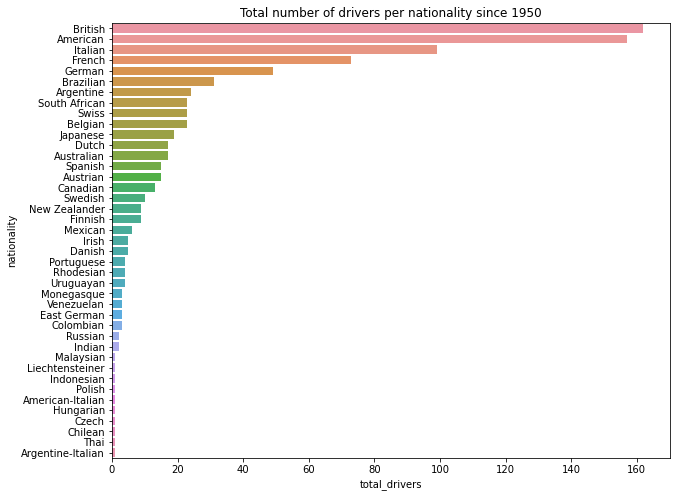

In [16]:
plt.figure(figsize=(10,8))
sns.barplot(data=drivers.sort_values('total_drivers',ascending=False),
            x='total_drivers',y='nationality')
plt.title('Total number of drivers per nationality since 1950')
plt

In [17]:
#We can see that the most prevalent nationalities on the F1 grid have been British, American, Italian & French. 

In [18]:
#I want to see which team has participated most in the Constructors since 1950

team = constructors.merge(results,on='constructorId',how = 'left')

In [19]:
team.head()

,constructorId,constructorRef,name,nationality,url,Unnamed: 5,resultId,raceId,driverId,number,...,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,NaN,1.0,18.0,1.0,22.0,...,1.0,10.0,58.0,34:50.6,5690616.0,39.0,2.0,01:27.5,218.3,1.0
1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,NaN,5.0,18.0,5.0,23.0,...,5.0,4.0,58.0,18.014,5708630.0,43.0,1.0,01:27.4,218.385,1.0
2,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,NaN,25.0,19.0,5.0,23.0,...,3.0,6.0,56.0,38.45,5517005.0,19.0,7.0,01:35.9,208.031,1.0
3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,NaN,27.0,19.0,1.0,22.0,...,5.0,4.0,56.0,46.548,5525103.0,53.0,3.0,01:35.5,209.033,1.0
4,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,NaN,49.0,20.0,5.0,23.0,...,5.0,4.0,57.0,26.789,5493759.0,49.0,1.0,01:33.2,209.062,1.0


In [21]:
#Cleaning the data before moving ahead

team.isna().any()

constructorId      False
constructorRef     False
name               False
nationality        False
url                False
Unnamed: 5          True
resultId            True
raceId              True
driverId            True
number              True
grid                True
position            True
positionText        True
positionOrder       True
points              True
laps                True
time                True
milliseconds        True
fastestLap          True
rank                True
fastestLapTime      True
fastestLapSpeed     True
statusId            True
dtype: bool

In [22]:
team = team.fillna(0)

In [23]:
drop_duplicates = team.drop_duplicates()

In [24]:
team.head()

,constructorId,constructorRef,name,nationality,url,Unnamed: 5,resultId,raceId,driverId,number,...,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,0.0,1.0,18.0,1.0,22.0,...,1.0,10.0,58.0,34:50.6,5690616.0,39.0,2.0,01:27.5,218.3,1.0
1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,0.0,5.0,18.0,5.0,23.0,...,5.0,4.0,58.0,18.014,5708630.0,43.0,1.0,01:27.4,218.385,1.0
2,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,0.0,25.0,19.0,5.0,23.0,...,3.0,6.0,56.0,38.45,5517005.0,19.0,7.0,01:35.9,208.031,1.0
3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,0.0,27.0,19.0,1.0,22.0,...,5.0,4.0,56.0,46.548,5525103.0,53.0,3.0,01:35.5,209.033,1.0
4,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,0.0,49.0,20.0,5.0,23.0,...,5.0,4.0,57.0,26.789,5493759.0,49.0,1.0,01:33.2,209.062,1.0


In [27]:
#Extracting the columns needed and grouping it by constructor name, extracting the total races entered

best_teams = team[['name','points','raceId']]
best_teams = best_teams.groupby('name')['raceId'].nunique().sort_values(ascending=False).reset_index(name = 'races')
best_teams = best_teams[best_teams['races'] >= 100]
best_teams.head() 

,name,races
0,Ferrari,951
1,McLaren,780
2,Williams,694
3,Tyrrell,433
4,Team Lotus,395


In [28]:
#We can see that Ferrari have completed the most races in the constructors championship at 951, followed by McLaren and Williams. 

<module 'matplotlib.pyplot' from '/Users/hannahlanders/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

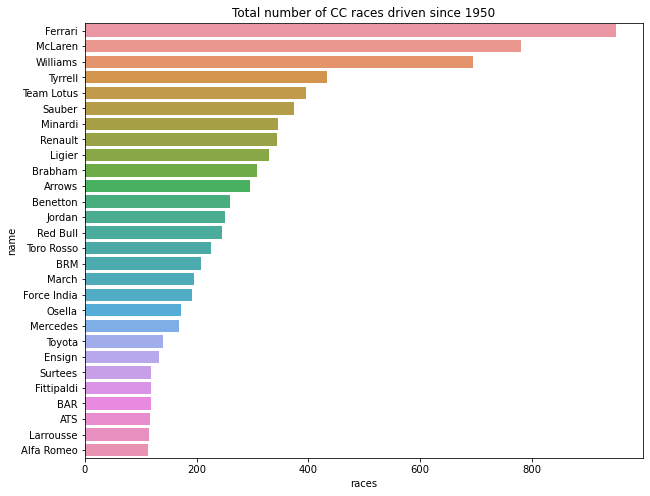

In [41]:
#Visualising this data

plt.figure(figsize=(10,8))
sns.barplot(data=best_teams.sort_values('races',ascending=False),
            x='races',y='name')
plt.title('Total number of CC races driven since 1950')
plt

In [33]:
#Webscraping from the racing statistics website to see who is winning the driver standings since the most recent race
#The content of this was going to be very large and messy so importing BeautifulSoup to parse the info 

from bs4 import BeautifulSoup as bs
import requests
f1request = requests.get('https://www.racing-statistics.com/en')
formulauno = bs(f1request.content, 'lxml')
formulauno.title

<title>F1 statistics, data, results and comparisons - Formula 1 Statistics</title>

In [34]:
formulauno.title.text

'F1 statistics, data, results and comparisons - Formula 1 Statistics'

In [35]:
current_driver_standing = formulauno.findAll('span', {"class":'nomob'})
current_driver_standing

[<span class="nomob">VER</span>,
 <span class="nomob">LEC</span>,
 <span class="nomob">PER</span>,
 <span class="nomob">RUS</span>,
 <span class="nomob">HAM</span>,
 <span class="nomob">SAI</span>,
 <span class="nomob">NOR</span>,
 <span class="nomob">OCO</span>,
 <span class="nomob">ALO</span>,
 <span class="nomob">BOT</span>,
 <span class="nomob">VET</span>,
 <span class="nomob">RIC</span>,
 <span class="nomob">MAG</span>,
 <span class="nomob">GAS</span>,
 <span class="nomob">STR</span>,
 <span class="nomob">TSU</span>,
 <span class="nomob">MSC</span>,
 <span class="nomob">ZHO</span>,
 <span class="nomob">ALB</span>,
 <span class="nomob">LAT</span>,
 <span class="nomob">DEV</span>,
 <span class="nomob">HUL</span>]

In [36]:
current_driver_standing[0].text

'VER'

In [37]:
#Above we can see that Verstappen 'VER' is winning the current drivers championship

<module 'matplotlib.pyplot' from '/Users/hannahlanders/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

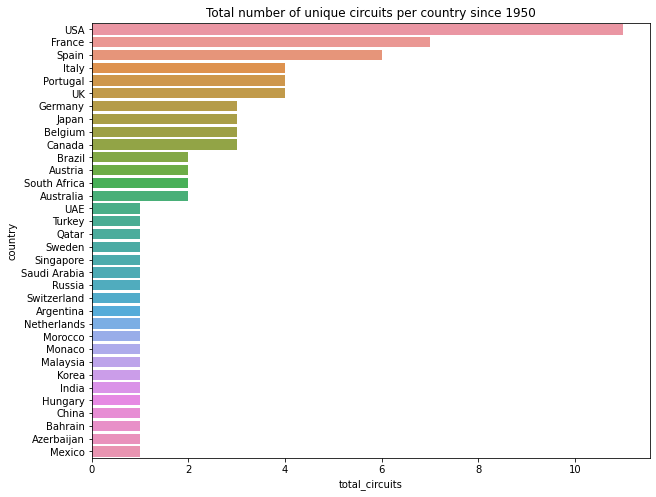

In [40]:
#Investigating which country has the most F1 circuits. 

circuits = pd.read_csv('/users/hannahlanders/downloads/circuits.csv')
df_circuits = circuits.groupby('country').agg({'name':'count'}).reset_index()
df_circuits.rename({'name':'total_circuits'},axis=1,inplace=True)

plt.figure(figsize=(10, 8))
sns.barplot(data=df_circuits.sort_values('total_circuits',ascending=False),
            x='total_circuits',y='country')
plt.title('Total number of unique circuits per country since 1950')
plt

In [42]:
#The top countries across the grids since 1950 have been: USA, France & Spain. 

In [43]:
#